In [ ]:
!pip install gdown
!gdown --id 12PZB5hWpwAyRuSWAgkaFdZdZluGf8_6Z
!gdown --id 1g1CEUs8BvSJXSDroHgjUbTa3izGp9WMO

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=12PZB5hWpwAyRuSWAgkaFdZdZluGf8_6Z
To: /content/test_signs.h5
100% 1.48M/1.48M [00:00<00:00, 74.8MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1g1CEUs8BvSJXSDroHgjUbTa3izGp9WMO
To: /content/train_signs.h5
100% 13.3M/13.3M [00:00<00:00, 27.0MB/s]


# Disclaimer

Before beginning this lab, please activate a GPU by going into :     
- Exécution
- Modifier le type d'éxecution
- GPU

# DNNs with TensorFlow

Welcome to the Deep Learning Lab sessions. As you had a slight introduction to Deep Learning through the Course, you will now apply it through this izi pizi labs.
This lab will be done using TensorFlow from Google.
You will learn to do the following in TensorFlow:

- Initialize variables
- Start your own session
- Train algorithms
- Implement a Neural Network

This part of the lab is splitted in two parts :
- Using Tensorflow
- Creating and Performing Classification using TF.

<img src="https://www.memesmonkey.com/images/memesmonkey/3f/3fd47d627866ac3f67bc4a38b0b2941c.jpeg">


# First Time Hun ?

So this might be your first time using Deep Learning for a certain task. So in this lab we will perform a certain Task : Classification. We will classify hands. Hun.

When training a DL Algorithm you need few things :
* A Dataset
* A Model
* A Learning Algorithm
* Some more things innit' ?

So we will navigate through each of these points to train a Model that performs Hand Signs Classification.

<img src = "https://i.kym-cdn.com/photos/images/original/000/123/620/Oh-boy-here-we-go.jpg">



# I - Dataset : SIGNS

**texte en gras**
We will use SIGNS Dataset. Let's first have some insight look on our Dataset
Load the train and test datasets


In [ ]:
import h5py
import numpy as np
import tensorflow as tf
import math
import matplotlib.pyplot as plt

# TODO : load the h5 files in the correct variables
train_dataset = h5py.File('/content/train_signs.h5', "r")
test_dataset = h5py.File('/content/test_signs.h5', "r")

# TODO : print the keys of each variables.
# Questions: Are the keys different ?
# the keys are not different except that train is replaced by test wich seems logical so far
print(train_dataset.keys())
print(test_dataset.keys())

# TODO : create x_train, y_train, x_test, y_test and convert them to array using numpy
# Questions : What is the length of each Dataset.
# every data sets have 6 class (I guess class of hand signs) the train dataset have 1080 instance for x and y, the test set have 120 for each

# Questions : What are the labels, what are our images ?
# I presume that x are the image and y are the label

x_train = np.array(train_dataset['train_set_x'][:])/255 # What's the purpose of 255 ? I guess for normalization purpose ?
y_train = np.array(train_dataset['train_set_y'][:])
x_test = np.array(test_dataset['test_set_x'][:])/255
y_test = np.array(test_dataset['test_set_y'][:])


y_train = np.array(train_dataset['train_set_y'][:]).reshape((y_train.shape[0]))
y_test = np.array(test_dataset['test_set_y'][:]).reshape((y_test.shape[0])) # seems useless but why not

# TODO : load the classes in an array.
# Questions : How many labels should you have ? (Count your fingers)
# 6 labels ?? like one for each class ?
classes = np.array(train_dataset['list_classes'][:])
print(len(classes))

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>
<KeysViewHDF5 ['list_classes', 'test_set_x', 'test_set_y']>
6


In [ ]:
print(classes)

[0 1 2 3 4 5]


In [ ]:
# TODO : create the datasets using from_tensor_slices class using x and y

print(y_train.shape, x_train.shape)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)) # hint: use tuple form ( , ) to merge your two array
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

(1080,) (1080, 64, 64, 3)


In [ ]:
# TODO : define a Batch Size
BATCH_SIZE = 64

# Create mini batches using .batch method
train_dataset = train_dataset.batch(BATCH_SIZE, name='train_dataset')
test_dataset = test_dataset.batch(BATCH_SIZE, name='test_dataset')



Few questions on the Dataset:
* How many elements do you have in your Train and Test Datasets ? Explain the shape of the Train Dataset

* What is the size of one element of the Dataset ?


* Are the images RGB images ?

Plot some images from the train Dataset with their labels along using Matplotlib

(64, 64, 3)


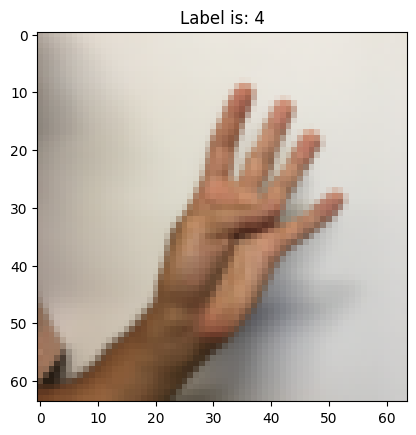

In [ ]:
index = 5
plt.title("Label is: " + str(np.squeeze(y_train[index])))
plt.imshow(x_train[index])
print(x_train[5].shape)


So now you have some understanding of the Dataset. Let's try things

# II- The Model : Your Choice

We are going to guide you a lil bit for this. In fact, you can create whatever model you want. However, they might not be as effective as some other networks.
In this part, we will try Dense Layers.

<img src = "https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/ANN-Graph.gif" height=300 >


* What is the other name of a Dense Layer ?

--> a dense layer is a layer where every neurons are fully connected with the previous layer.
another name for it could be fully connected layer.

To create this FC model, you have to understand few things :
* The input Layer will have a Fixed number of Neurons that must correspond to the image's size.
* Between the Layers, you must apply some non-linearity so that the model learns complex features.
* You have to compromise between the Shallowness or Depth of your Model. You'll understand why in the next lab.

<img src="https://miro.medium.com/max/1400/1*E4_pTJctmAofSRpZCZbv-g.jpeg" height=300>


Let's create a simple Sequential Model :    
* an Input Layer
* a Hidden Layer
* an Output Layer

(Like the picture above Andrew)

In [ ]:
# TODO : We wrote a model for you but there are some mistakes. Find and Correct the mistakes.
# Question : What is the input shape ?
# Question : What is the output shape ?
# Question : What non linearity must we add ?

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(64, 64, 3)), # shape of our image
  tf.keras.layers.Dense(128, activation='relu'), # hidden layer 1
  tf.keras.layers.Dense(128, activation='relu'), # hidden layer 2
  tf.keras.layers.Dense(6, activation='softmax') # output layer, using softmax to output predictions in probabilty vector
])

Some questions related to Memes on Activation Functions :

<img src="https://2.bp.blogspot.com/-IdxHoo3lTrU/XHXNi8HM4_I/AAAAAAAAOhY/xTrp-Z8yYjY6NVBs-PXHw2Gho53vU90DgCLcBGAs/s1600/52386901_10157143758983669_1120348777576660992_o.jpg" height = 400>

*  How do you understand the ReLU function as an activation of a layer ?
The ReLU activation function is defined as ReLU(x) = max(0, x).
it is quiet straight forward. all the activation under 0 will be shut down to 0 and thus have no weight in the forward activations

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQGVkqoa4YitmdIj-pCt88odvoscPbgocSPDQ&usqp=CAU" >

* Can we use any activation functions ? Take the example of multiclass classification, can we use the same activation function in the last layer and in the earlier layers ?

--> it will depend on the type of task your model is trying to learn. activations functions have differente property, some of them are designed for specific Loss function (ex: sigmoid and BCELoss).

--> for multiclass classiffication we tend to use a softmax activation function that will squish our output into probability, wich is more convenient for the Loss function (avoiding big values).

# III- The Loss

<img src="https://i.imgflip.com/63x65w.jpg" height= 200>

Now we need something to tell our model if it predicts well or no. Let's say your model predicts something. We need to compute how far the prediction is compared to the real label. The goal is to have a model that predicts well things.



In fact, Tensorflow already has coded a bunch of Losses for us. You can have a
look at all the existing losses here :
* https://www.tensorflow.org/api_docs/python/tf/keras/losses/Loss


We need a loss that can measure the difference between two probability distributions. That has something to do with their entropy.
* What loss will we be using here ?

--> the categorical cross entropy seems appropriate since we are going to output a probability distribution.

If you don't know how to answer the previous question, ask yourself these things :

* Do we have labels ?
* What task are we performing ? Regression or Classification ?

* What must be the output of our model ?


In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy()

# IV - The Optimizer

So at the end of the Model, we can compute a loss. We need to back-propagate the loss to all the layers so that it sees and understands the end result of a prediction and search for a Local-Global Optimum. You have plenty of optimizers available, the simplest is Gradient Descent. We pratically use Stochastic Gradient Descent in order to find a Global Minimum where the model should be performing 'well'.

<img src="https://www.memecreator.org/static/images/memes/5296549.jpg" height = 300>


Have a look at the existing optimizers in TensorFlow :    
* https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

We will use ADAM. In fact, we can use SGD or any other Optimizer. However, ADAM
for Adaptive Moment Estimation is more robust than SGD. (and it has more things such as per parameter learning rate adaptation that improves performance on sparse gradient and other things (To quote Andrew NG : Don't worry about it if you don't understand it)

<img src="https://i.pinimg.com/474x/7b/58/bb/7b58bb3b853ff61ed8873aeb711cb3b6.jpg">

In [ ]:
# TODO : Load Adam optimizer and set a learning rate.
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

# V - The Compilation

Now that we have all we need, we have to compile the model with all the preceding stuff.

That's where TensorFlow is cool. It has a compile method that compiles everything for you.

In [ ]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['categorical_accuracy']) # metric are useful for calculation

# VI- The Training

When you train, you become fit. In Deep Learning, we fit a distribution of Data to the model so that it learns a specific task.

Again, TensorFlow has a great method that fits data for you.

In [ ]:
num_epochs = 100
model.fit(model,
          epochs=num_epochs)

ValueError: Failed to find data adapter that can handle input: <class 'keras.src.engine.sequential.Sequential'>, <class 'NoneType'>

AW.. It doesn't work ....


<img src="https://media.npr.org/assets/img/2016/03/29/ap_090911089838_sq-3271237f28995f6530d9634ff27228cae88e3440-s900-c85.webp" height = 200>

In fact, it is normal. Let's have a closer look on our Dataset and our Model.

# VII - The Investigation

<img src="https://www.meme-arsenal.com/memes/aab2bd04fcd6bc0642f0ab60718bac0d.jpg" height=200>

In [ ]:
print(y_train)

[5 0 2 ... 2 4 5]


As you might see, the labels are numbers between 0,5. The model will have issues to predict these numbers. That's quite complicated for it. In fact, we put a SoftMax activation layer at the end. The SoftMax makes the model behaves as follows :

Let's say that the Last Layer has 6 Neurons. We want to train the model so that
when the model sees an image of 0 the 1rst neuron has the highest value. When it sees an image of 1 the 2nd neurons has the highest value.. and so on.

That means that we need to change our label to something that helps us to learn to activate the wanted neuron for an image.

Let's do some 1-Hot Encoding.

<img src= "https://sandipanweb.files.wordpress.com/2018/01/signs_data_kiank1.png?w=676">

Basically, we are going to map each values to a one-hot-encoded vector, so that the output layers correct neurons ouputs the highest value.






In [ ]:
# TODO : Create a function that 1-Hot encodes a number into a given size vector. Or have a look at this : https://www.tensorflow.org/api_docs/python/tf/one_hot

y_train_oh = tf.one_hot(y_train, len(classes))
y_test_oh =  tf.one_hot(y_test, len(classes))

# TODO : Print the 1-Hot encoded labels and the original labels and show us the difference

print(y_train_oh)
print(y_train)

# TODO : Recreate your train_dataset with one hot encoded vectors
print(x_train.shape, y_train_oh.shape)
train_dataset_oh = tf.data.Dataset.from_tensor_slices((x_train, y_train_oh))
test_dataset_oh = tf.data.Dataset.from_tensor_slices((x_test, y_test_oh))


# TODO : Recreate your mini batches
BATCH_SIZE = 64

train_dataset_oh  = train_dataset_oh.batch(BATCH_SIZE)
test_dataset_oh = test_dataset_oh.batch(BATCH_SIZE)

tf.Tensor(
[[0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]], shape=(1080, 6), dtype=float32)
[5 0 2 ... 2 4 5]
(1080, 64, 64, 3) (1080, 6)


# VIII - The Retraining after Debugging
Ok let's try again

In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy()
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['categorical_accuracy'])

num_epochs = 200
history = model.fit(train_dataset_oh,epochs=num_epochs)

Epoch 1/200
17/17 [==============================] - 3s 43ms/step - loss: 4.4369 - categorical_accuracy: 0.1824
Epoch 2/200
17/17 [==============================] - 1s 55ms/step - loss: 1.8563 - categorical_accuracy: 0.2046
Epoch 3/200
17/17 [==============================] - 1s 50ms/step - loss: 1.7152 - categorical_accuracy: 0.2981
Epoch 4/200
17/17 [==============================] - 1s 42ms/step - loss: 1.6604 - categorical_accuracy: 0.3333
Epoch 5/200
17/17 [==============================] - 1s 44ms/step - loss: 1.5928 - categorical_accuracy: 0.4102
Epoch 6/200
17/17 [==============================] - 1s 40ms/step - loss: 1.5102 - categorical_accuracy: 0.4500
Epoch 7/200
17/17 [==============================] - 1s 46ms/step - loss: 1.4234 - categorical_accuracy: 0.5074
Epoch 8/200
17/17 [==============================] - 1s 51ms/step - loss: 1.3356 - categorical_accuracy: 0.5361
Epoch 9/200
17/17 [==============================] - 1s 70ms/step - loss: 1.2514 - categorical_accuracy:

Now let's plot some things using the history variable.
History logs everything that occurs during training.

Let's explore what it registered.
* Print the values of history
* Using Pyplot, plots the differnets keys in the history variable

dict_keys(['loss', 'categorical_accuracy'])
[0.182407408952713, 0.20462962985038757, 0.29814815521240234, 0.3333333432674408, 0.41018518805503845, 0.44999998807907104, 0.5074074268341064, 0.5361111164093018, 0.5638889074325562, 0.5787037014961243, 0.604629635810852, 0.645370364189148, 0.6694444417953491, 0.6944444179534912, 0.7037037014961243, 0.7037037014961243, 0.7129629850387573, 0.7324073910713196, 0.7379629611968994, 0.7537037134170532, 0.7648147940635681, 0.7657407522201538, 0.7805555462837219, 0.8027777671813965, 0.8018518686294556, 0.8194444179534912, 0.824999988079071, 0.8361111283302307, 0.845370352268219, 0.8472222089767456, 0.8537036776542664, 0.8611111044883728, 0.8629629611968994, 0.8703703880310059, 0.8787037134170532, 0.8805555701255798, 0.8870370388031006, 0.8861111402511597, 0.8879629373550415, 0.8925926089286804, 0.8916666507720947, 0.8611111044883728, 0.8064814805984497, 0.8388888835906982, 0.8712962865829468, 0.8787037134170532, 0.855555534362793, 0.896296322345733

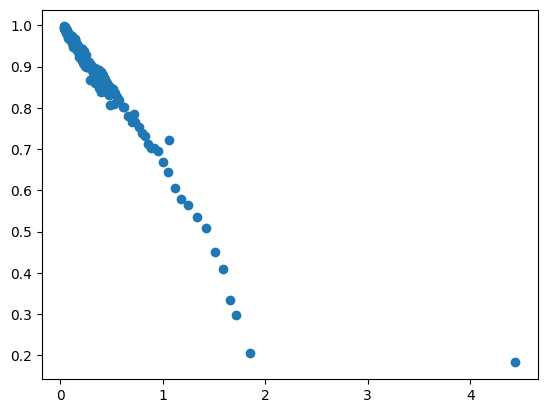

In [ ]:
import matplotlib.pyplot as plt

# TODO : print the values of the history variables
print(history.history.keys())

# TODO : define accuracy and loss
acc = history.history['categorical_accuracy']
loss = history.history['loss']

print(acc)
# TODO : plot the accuracy and the loss
# Question : did the model learn anything ?
# yes the model seems to have learned something, there is a clear correlation as the loss goes down, the accuracy of prediction get very close from one
plt.scatter(loss, acc)
plt.show()



IX - The Evaluation

Now that we trained the model, let's evaluate it on the test dataset. Again, TensforFlow has this great .evaluate() method that evaluates your model to a dataset.

* Evaluate your trained model to the Test Dataset.

In [ ]:
# TODO : Evaluate your model on the test dataset.
model.evaluate(test_dataset_oh)

2/2 [==============================] - 0s 12ms/step - loss: 0.7741 - categorical_accuracy: 0.7000


[0.7741137146949768, 0.699999988079071]

Hun. Some values that we don't really understand ? Ok let's plot some images to see the mistakes made by the model.

<img src="https://i.imgflip.com/63vr6e.jpg" height=200>

In [ ]:
for i, element1 in enumerate(test_dataset_oh.as_numpy_iterator()):
  element = element1
  if not i:
    break
label = element[1][56]
img_array = tf.keras.utils.img_to_array(element[0][56])
img_array = tf.expand_dims(img_array, 0)
my_image_prediction = model.predict(img_array)
label = tf.expand_dims(label, 0)
print(label.shape, img_array.shape)
eval = model.evaluate(img_array, label)
print('icicicici--', eval)
print(my_image_prediction)

1/1 [==============================] - 0s 94ms/step
(1, 6) (1, 64, 64, 3)
1/1 [==============================] - 0s 143ms/step - loss: 2.2075e-04 - categorical_accuracy: 1.0000
icicicici-- [0.00022075122979003936, 1.0]
[[2.0952423e-06 2.9227187e-11 1.1322770e-06 2.0480202e-06 9.9977928e-01
  2.1542715e-04]]


1/1 [==============================] - 0s 28ms/step - loss: 1.0649 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 1. 0. 0. 0.]


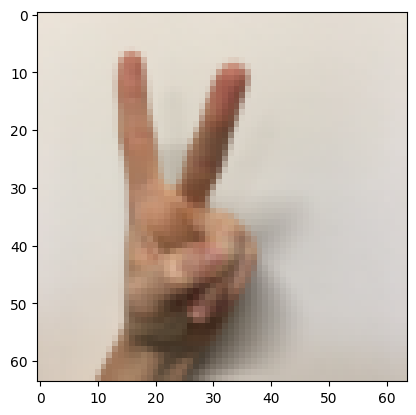

1/1 [==============================] - 0s 26ms/step - loss: 0.7312 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 5
GT Label is: y = [1. 0. 0. 0. 0. 0.]


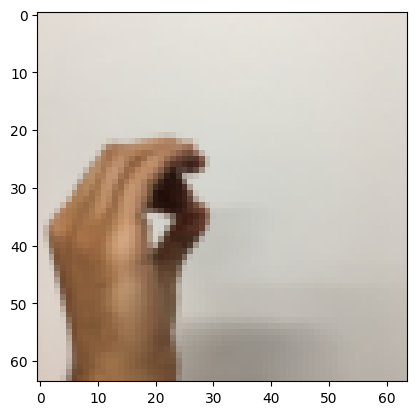

1/1 [==============================] - 0s 36ms/step - loss: 0.7231 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 1. 0. 0. 0.]


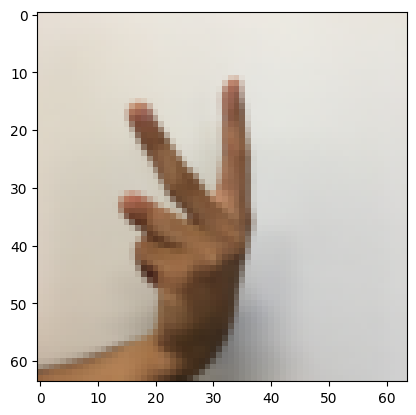

1/1 [==============================] - 0s 30ms/step - loss: 1.6027 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 1. 0. 0. 0.]


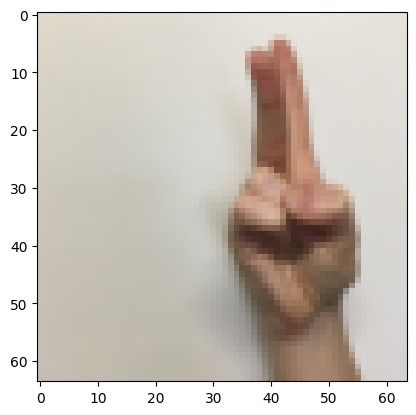

1/1 [==============================] - 0s 25ms/step - loss: 0.9201 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 1. 0. 0. 0.]


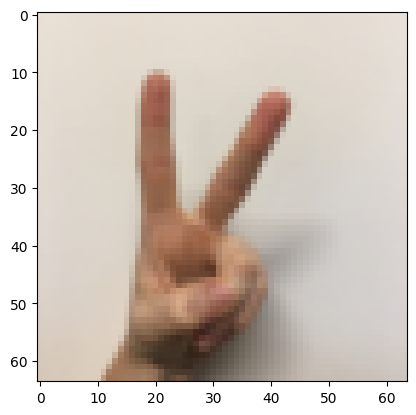

1/1 [==============================] - 0s 25ms/step - loss: 2.4615 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 1. 0. 0. 0.]


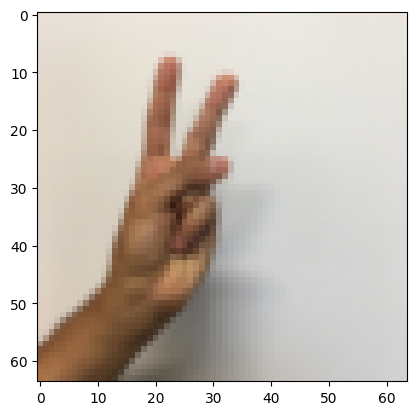

1/1 [==============================] - 0s 28ms/step - loss: 1.9053 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [1. 0. 0. 0. 0. 0.]


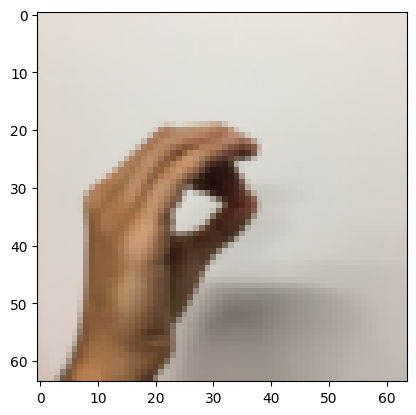

1/1 [==============================] - 0s 26ms/step - loss: 1.2677 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 2
GT Label is: y = [1. 0. 0. 0. 0. 0.]


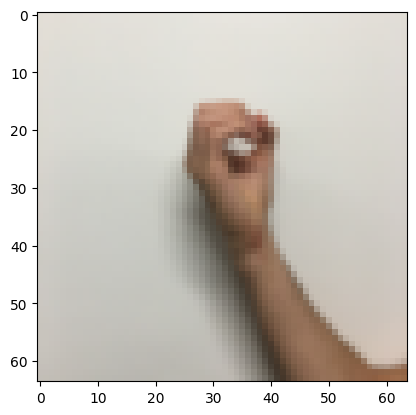

1/1 [==============================] - 0s 24ms/step - loss: 2.6428 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [1. 0. 0. 0. 0. 0.]


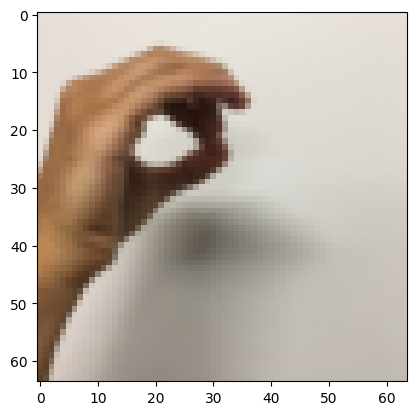

1/1 [==============================] - 0s 27ms/step - loss: 1.8616 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 5
GT Label is: y = [1. 0. 0. 0. 0. 0.]


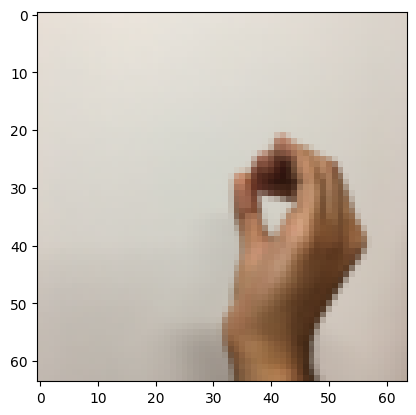

1/1 [==============================] - 0s 27ms/step - loss: 1.8519 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [1. 0. 0. 0. 0. 0.]


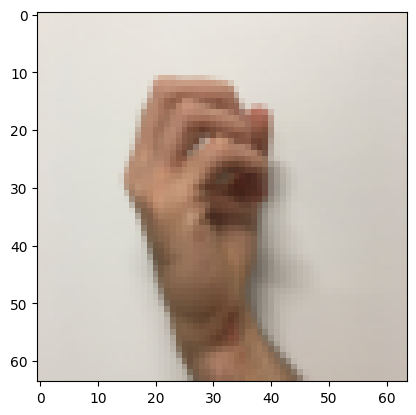

1/1 [==============================] - 0s 24ms/step - loss: 1.5188 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 0. 1. 0. 0.]


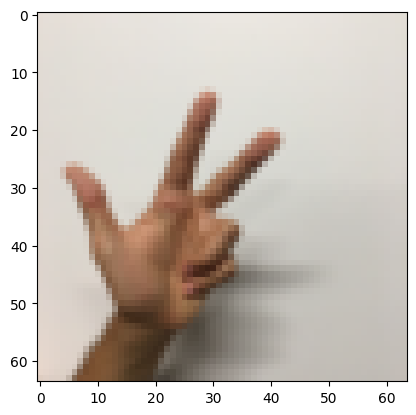

1/1 [==============================] - 0s 25ms/step - loss: 1.4269 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 5
GT Label is: y = [1. 0. 0. 0. 0. 0.]


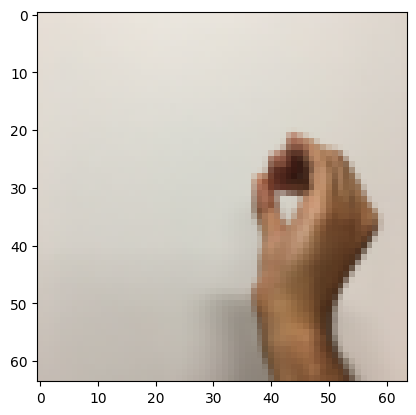

1/1 [==============================] - 0s 29ms/step - loss: 1.6989 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 1. 0. 0. 0.]


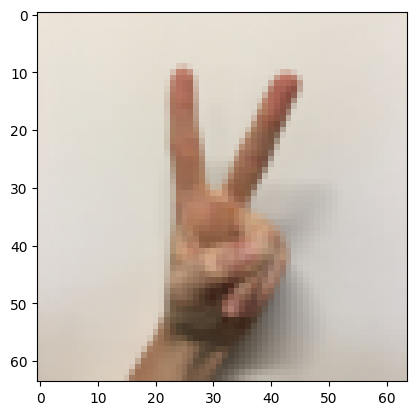

1/1 [==============================] - 0s 25ms/step - loss: 1.3555 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 1. 0. 0. 0.]


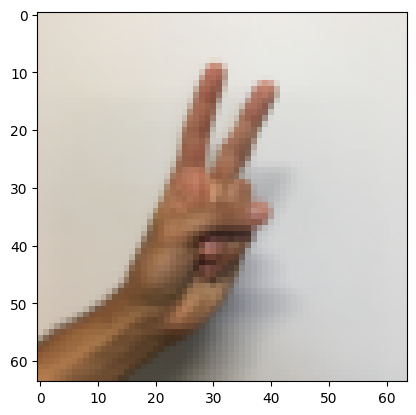

1/1 [==============================] - 0s 24ms/step - loss: 3.3297 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 5
GT Label is: y = [1. 0. 0. 0. 0. 0.]


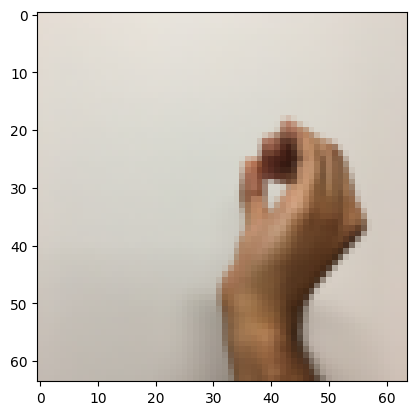

1/1 [==============================] - 0s 34ms/step - loss: 0.8143 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [1. 0. 0. 0. 0. 0.]


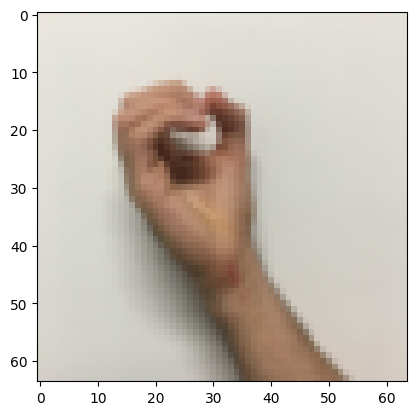

1/1 [==============================] - 0s 41ms/step - loss: 0.8643 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 1
GT Label is: y = [1. 0. 0. 0. 0. 0.]


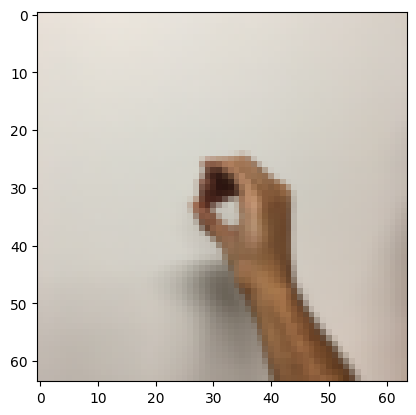

1/1 [==============================] - 0s 44ms/step - loss: 1.8519 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [1. 0. 0. 0. 0. 0.]


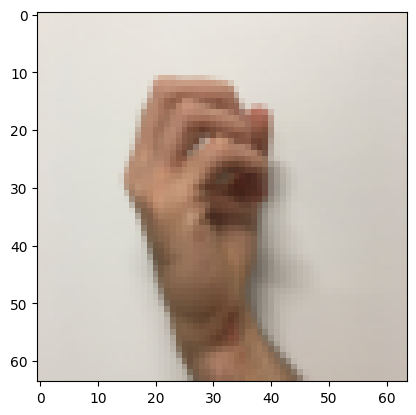

1/1 [==============================] - 0s 37ms/step - loss: 2.2731 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [1. 0. 0. 0. 0. 0.]


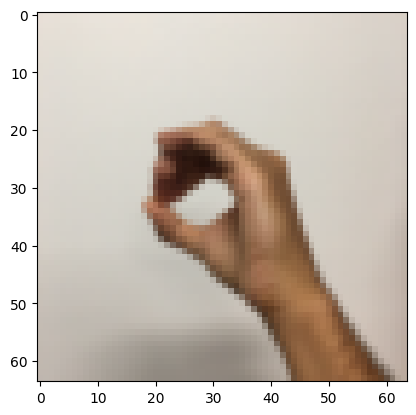

1/1 [==============================] - 0s 28ms/step - loss: 0.9836 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 0. 0. 0. 1.]


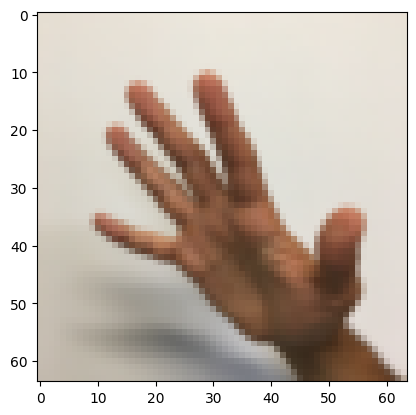

1/1 [==============================] - 0s 28ms/step - loss: 0.8632 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 0. 0. 0. 1.]


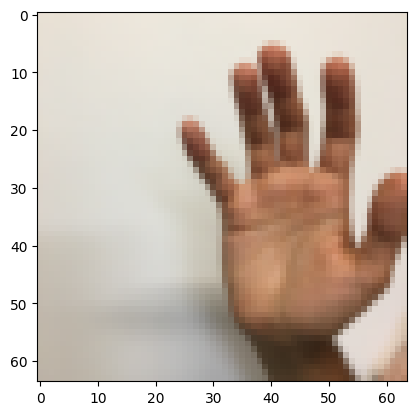

1/1 [==============================] - 0s 26ms/step - loss: 0.9037 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 0. 0. 0. 1.]


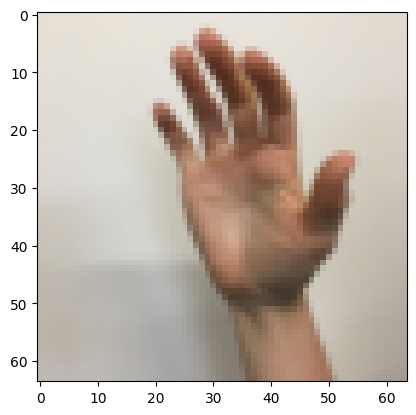

1/1 [==============================] - 0s 25ms/step - loss: 1.1158 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 1
GT Label is: y = [1. 0. 0. 0. 0. 0.]


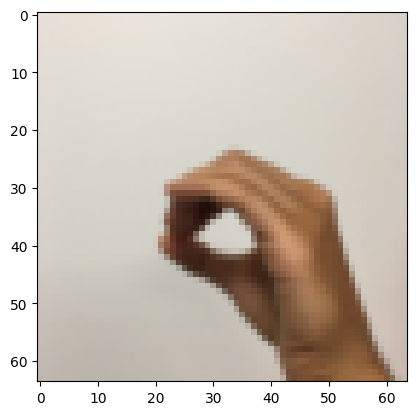

1/1 [==============================] - 0s 26ms/step - loss: 2.2058 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [1. 0. 0. 0. 0. 0.]


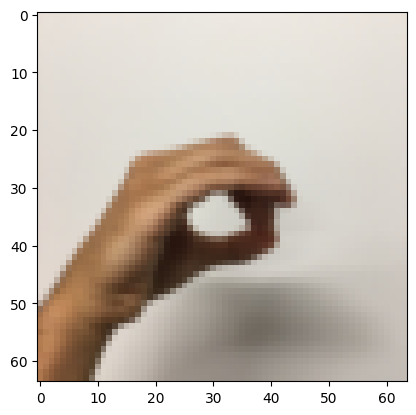

1/1 [==============================] - 0s 29ms/step - loss: 0.8158 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 1. 0. 0. 0.]


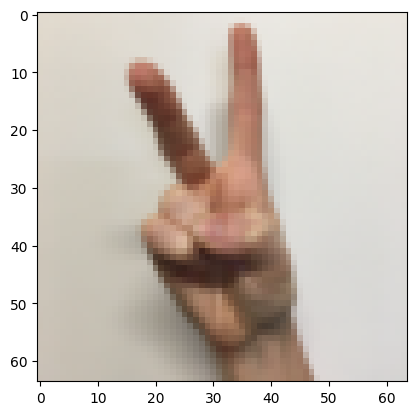

1/1 [==============================] - 0s 26ms/step - loss: 0.8643 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 1
GT Label is: y = [1. 0. 0. 0. 0. 0.]


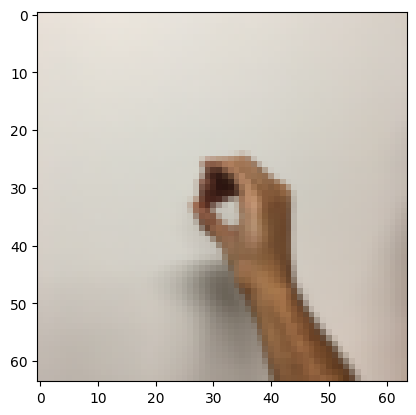

1/1 [==============================] - 0s 36ms/step - loss: 1.2412 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 1. 0. 0. 0.]


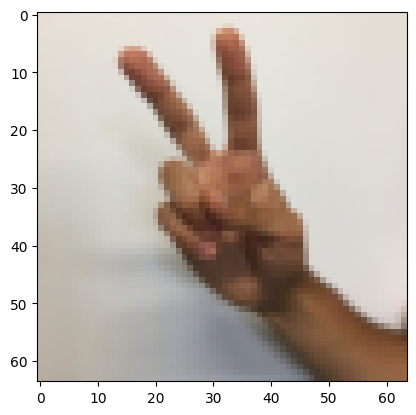

1/1 [==============================] - 0s 31ms/step - loss: 4.2934 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 1
GT Label is: y = [1. 0. 0. 0. 0. 0.]


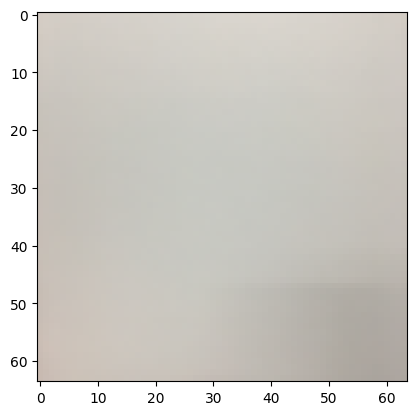

1/1 [==============================] - 0s 31ms/step - loss: 2.0149 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 0. 1. 0. 0.]


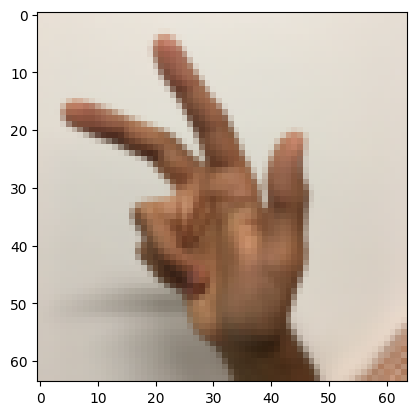

1/1 [==============================] - 0s 24ms/step - loss: 1.4051 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [1. 0. 0. 0. 0. 0.]


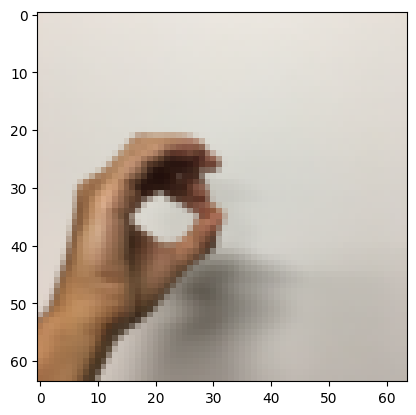

1/1 [==============================] - 0s 25ms/step - loss: 1.5571 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [1. 0. 0. 0. 0. 0.]


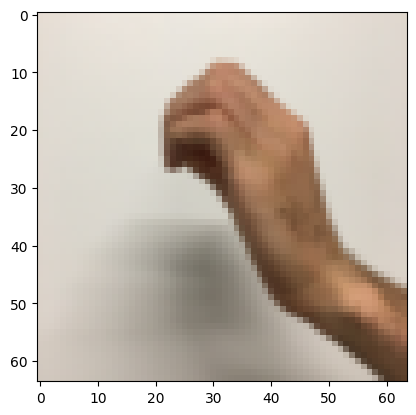

1/1 [==============================] - 0s 26ms/step - loss: 1.7357 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 1
GT Label is: y = [1. 0. 0. 0. 0. 0.]


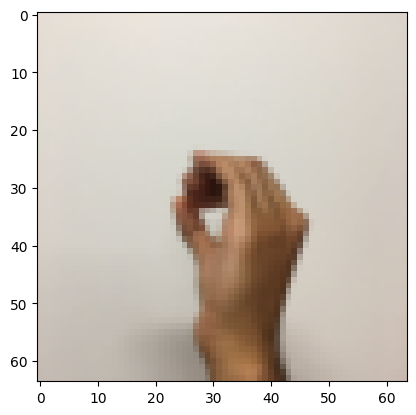

1/1 [==============================] - 0s 25ms/step - loss: 0.7331 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 2
GT Label is: y = [1. 0. 0. 0. 0. 0.]


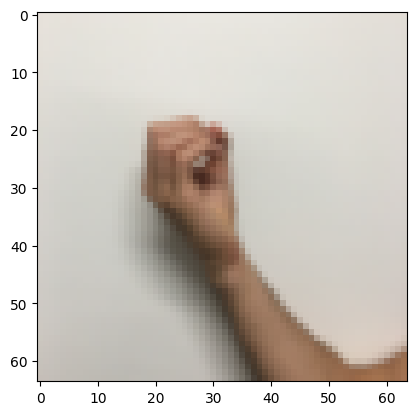

1/1 [==============================] - 0s 26ms/step - loss: 0.8955 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 1. 0. 0. 0.]


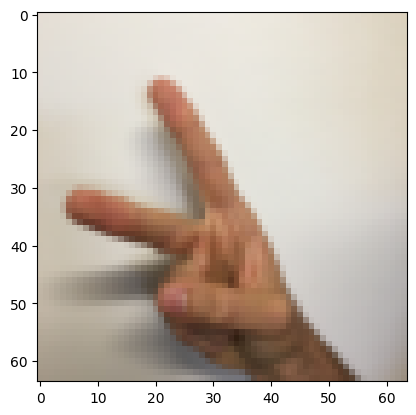

1/1 [==============================] - 0s 25ms/step - loss: 2.1087 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 0. 0. 0. 1.]


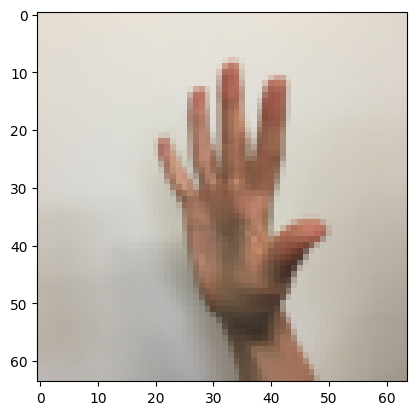

1/1 [==============================] - 0s 28ms/step - loss: 1.8140 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 1. 0. 0. 0.]


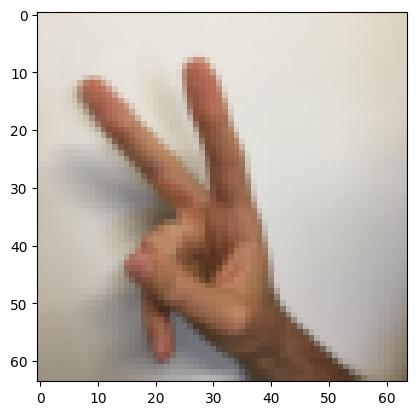

1/1 [==============================] - 0s 25ms/step - loss: 0.7757 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 0. 1. 0. 0.]


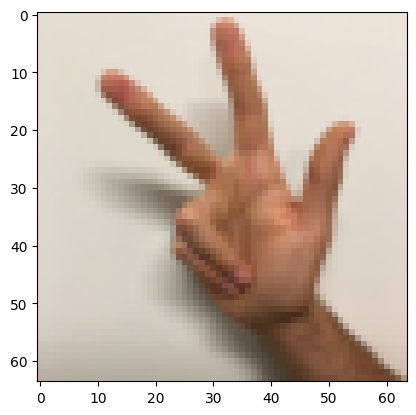

1/1 [==============================] - 0s 25ms/step - loss: 3.1170 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 5
GT Label is: y = [1. 0. 0. 0. 0. 0.]


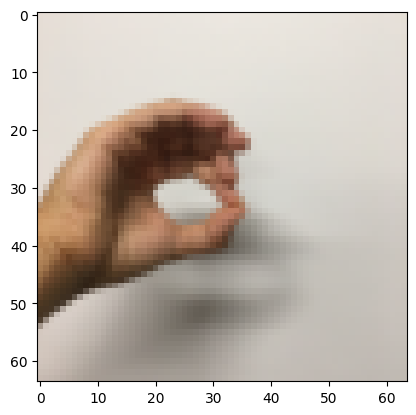

1/1 [==============================] - 0s 26ms/step - loss: 3.1237 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 0. 1. 0. 0.]


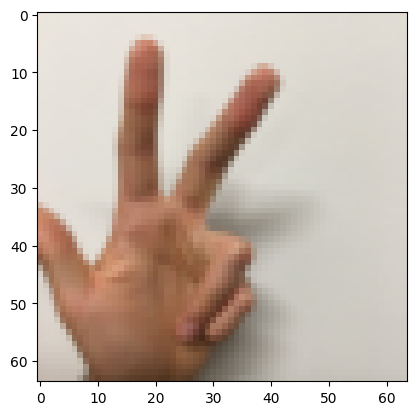

1/1 [==============================] - 0s 25ms/step - loss: 1.8616 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 5
GT Label is: y = [1. 0. 0. 0. 0. 0.]


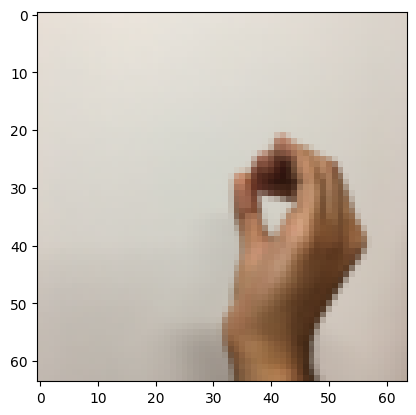

1/1 [==============================] - 0s 42ms/step - loss: 1.2573 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 1. 0. 0. 0.]


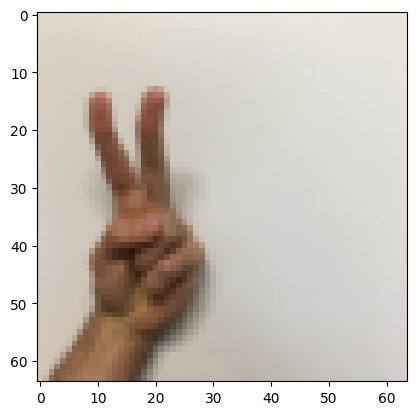

1/1 [==============================] - 0s 37ms/step - loss: 4.9958 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [1. 0. 0. 0. 0. 0.]


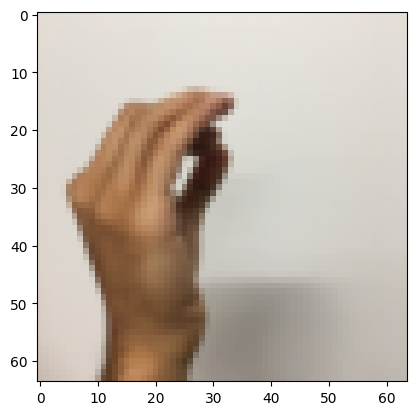

1/1 [==============================] - 0s 47ms/step - loss: 2.0934 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 5
GT Label is: y = [1. 0. 0. 0. 0. 0.]


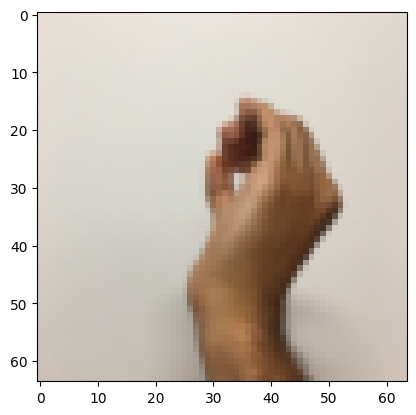

1/1 [==============================] - 0s 27ms/step - loss: 0.8605 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 1. 0. 0. 0.]


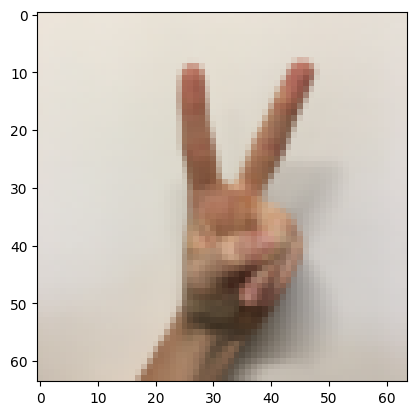

1/1 [==============================] - 0s 26ms/step - loss: 1.0876 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 0. 1. 0. 0.]


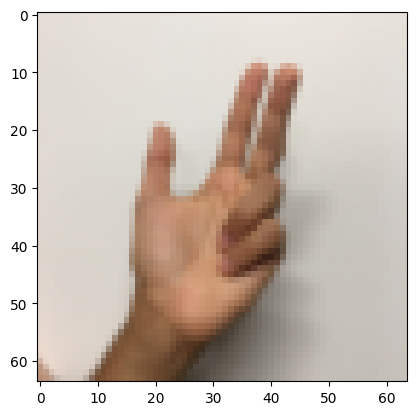

1/1 [==============================] - 0s 27ms/step - loss: 1.7532 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 1. 0. 0. 0.]


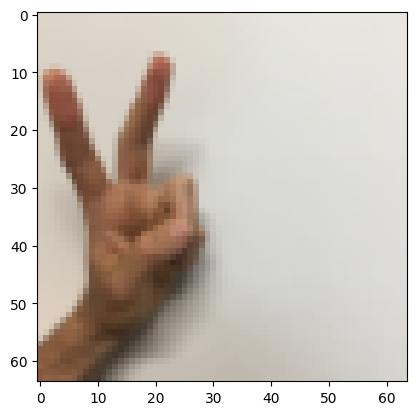

1/1 [==============================] - 0s 24ms/step - loss: 1.9205 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 1. 0. 0. 0.]


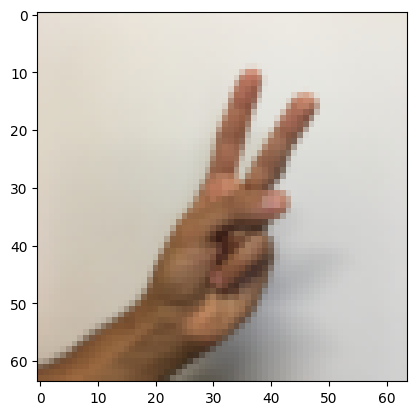

1/1 [==============================] - 0s 26ms/step - loss: 1.1158 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 1
GT Label is: y = [1. 0. 0. 0. 0. 0.]


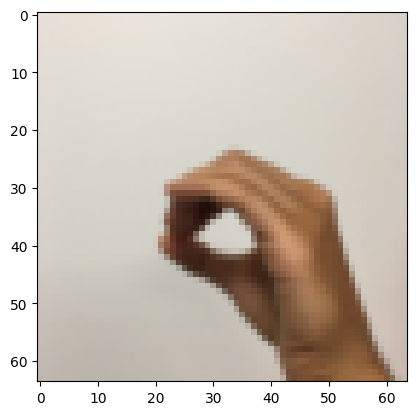

1/1 [==============================] - 0s 28ms/step - loss: 5.6574 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [1. 0. 0. 0. 0. 0.]


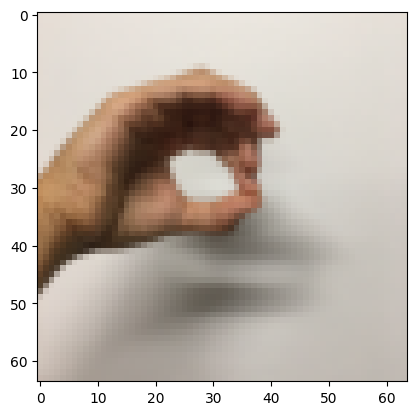

1/1 [==============================] - 0s 25ms/step - loss: 1.2311 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 1. 0. 0. 0.]


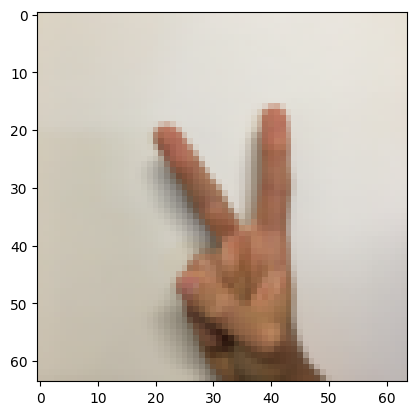

1/1 [==============================] - 0s 29ms/step - loss: 3.7461 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [1. 0. 0. 0. 0. 0.]


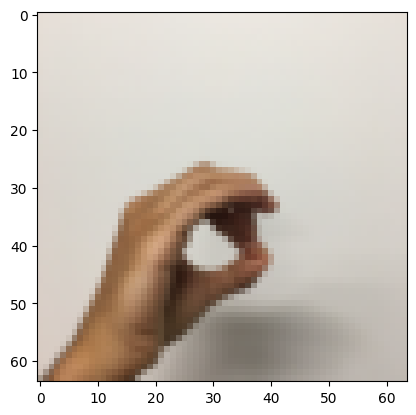

1/1 [==============================] - 0s 43ms/step - loss: 0.7026 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 1. 0. 0. 0.]


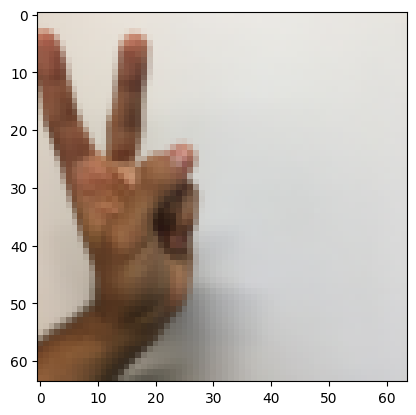

1/1 [==============================] - 0s 35ms/step - loss: 2.0915 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 0. 1. 0. 0.]


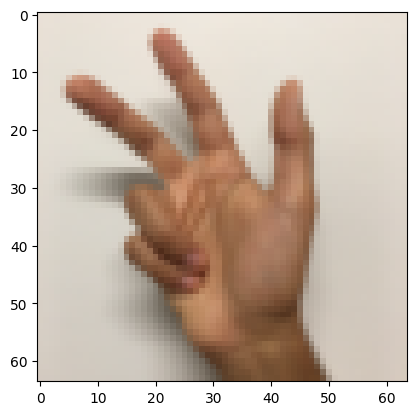

1/1 [==============================] - 0s 36ms/step - loss: 0.8522 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 1
GT Label is: y = [1. 0. 0. 0. 0. 0.]


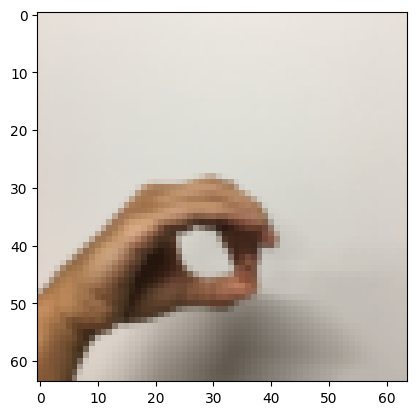

1/1 [==============================] - 0s 27ms/step - loss: 0.8951 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 1. 0. 0. 0. 0.]


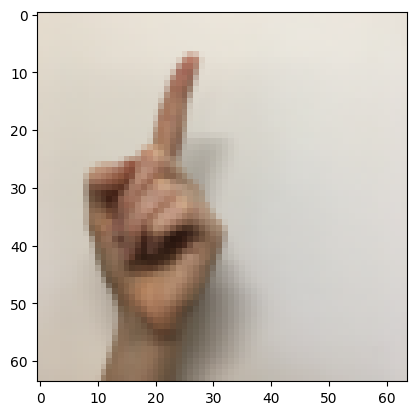

1/1 [==============================] - 0s 25ms/step - loss: 1.9507 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 0. 1. 0. 0.]


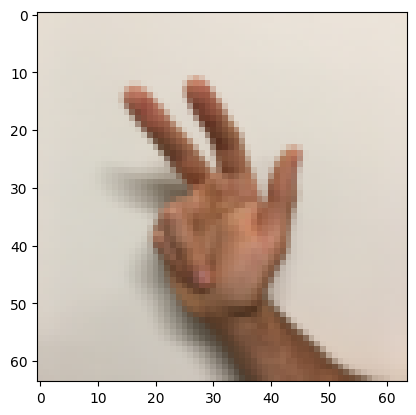

1/1 [==============================] - 0s 26ms/step - loss: 2.2731 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [1. 0. 0. 0. 0. 0.]


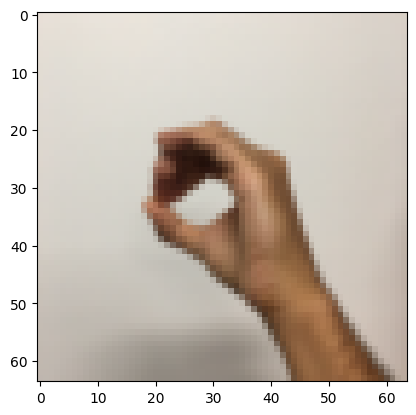

1/1 [==============================] - 0s 26ms/step - loss: 0.9148 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 5
GT Label is: y = [0. 0. 1. 0. 0. 0.]


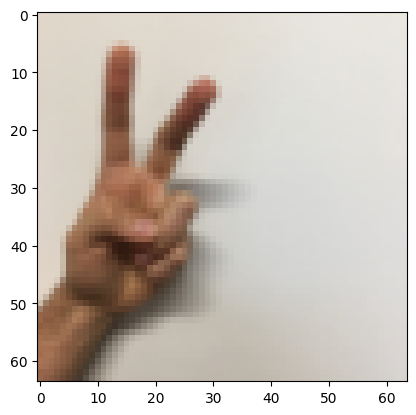

1/1 [==============================] - 0s 25ms/step - loss: 0.9748 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [1. 0. 0. 0. 0. 0.]


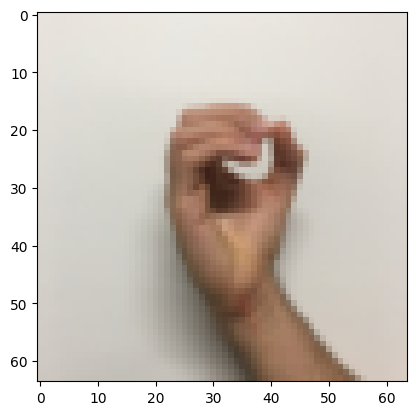

1/1 [==============================] - 0s 29ms/step - loss: 0.8193 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 1. 0. 0. 0.]


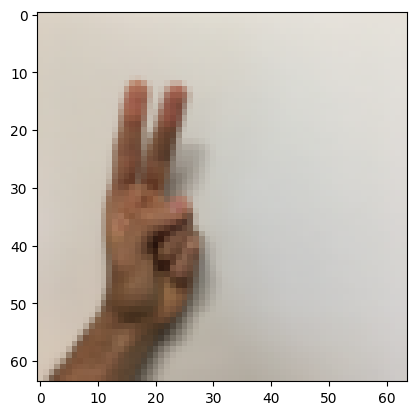

1/1 [==============================] - 0s 28ms/step - loss: 1.7182 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 1. 0. 0. 0.]


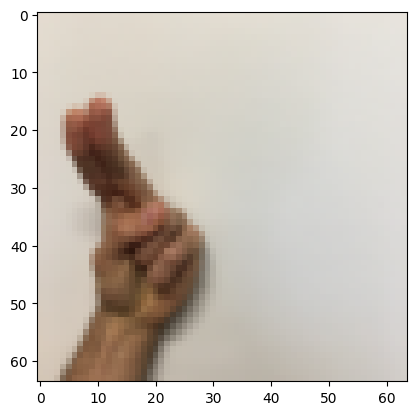

1/1 [==============================] - 0s 36ms/step - loss: 1.0286 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 1. 0. 0. 0.]


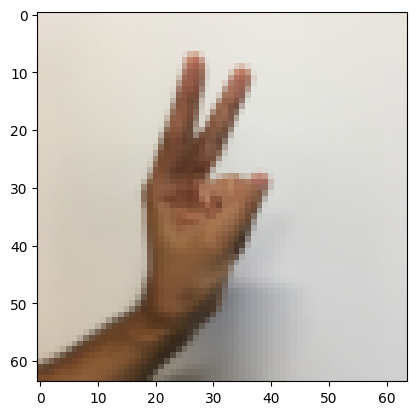

1/1 [==============================] - 0s 34ms/step - loss: 1.9116 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 1. 0. 0. 0.]


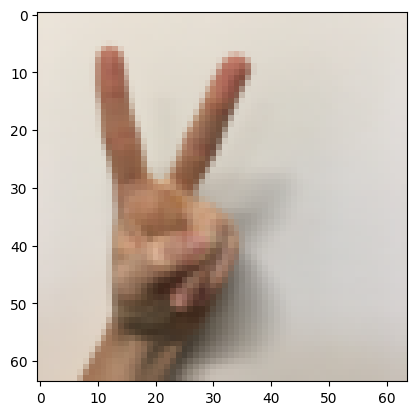

1/1 [==============================] - 0s 32ms/step - loss: 1.4702 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 0. 1. 0. 0.]


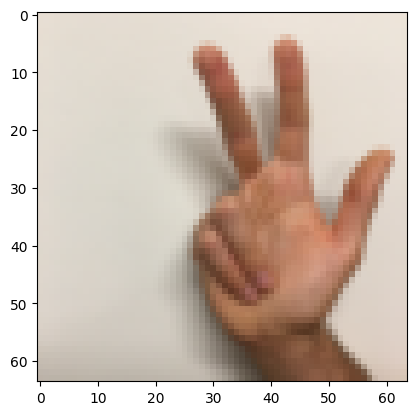

1/1 [==============================] - 0s 25ms/step - loss: 1.1994 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 1. 0. 0. 0.]


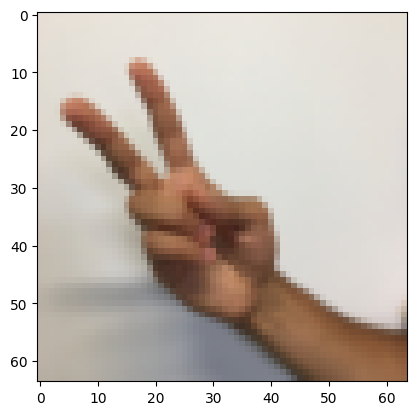

1/1 [==============================] - 0s 28ms/step - loss: 1.0531 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 5
GT Label is: y = [1. 0. 0. 0. 0. 0.]


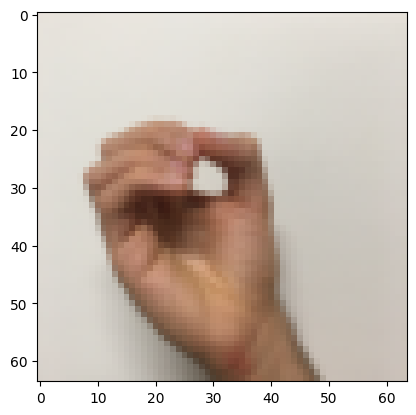

1/1 [==============================] - 0s 25ms/step - loss: 0.9739 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 0. 1. 0. 0.]


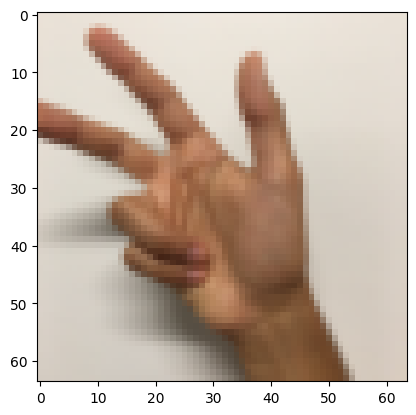

1/1 [==============================] - 0s 26ms/step - loss: 5.7149 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [1. 0. 0. 0. 0. 0.]


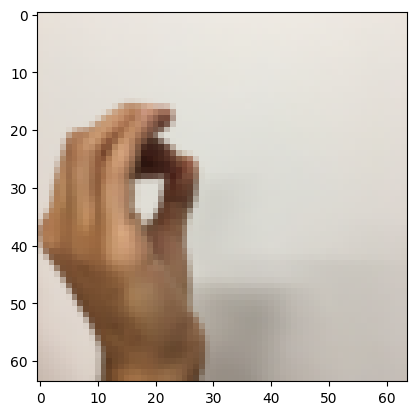

1/1 [==============================] - 0s 36ms/step - loss: 1.7832 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 1. 0. 0. 0.]


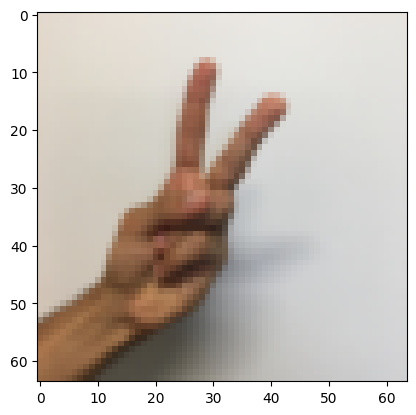

1/1 [==============================] - 0s 41ms/step - loss: 0.7835 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 1. 0. 0. 0.]


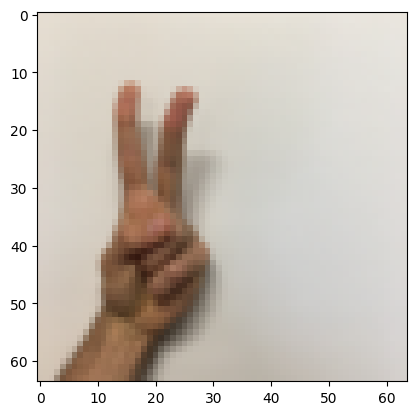

1/1 [==============================] - 0s 40ms/step - loss: 1.2550 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 0. 0. 0. 1.]


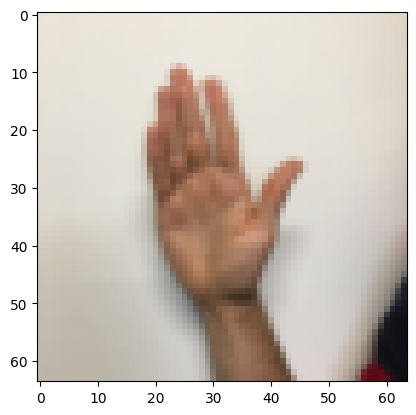

1/1 [==============================] - 0s 24ms/step - loss: 3.1892 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [1. 0. 0. 0. 0. 0.]


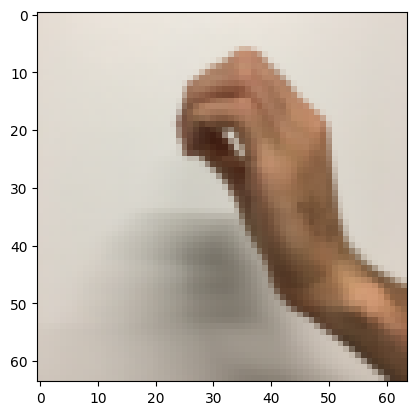

1/1 [==============================] - 0s 27ms/step - loss: 0.7899 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 1. 0. 0. 0. 0.]


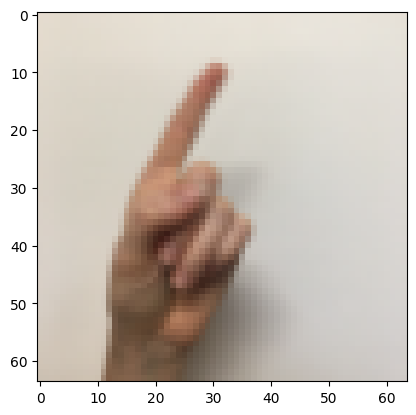

1/1 [==============================] - 0s 35ms/step - loss: 1.0695 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 1. 0. 0. 0.]


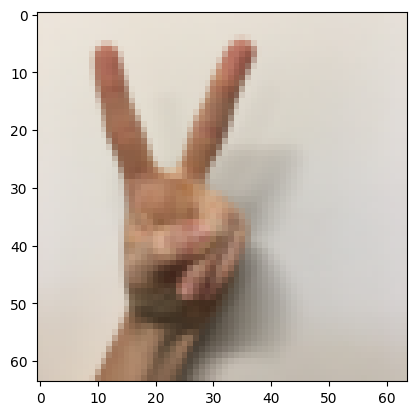

1/1 [==============================] - 0s 26ms/step - loss: 0.9830 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 1. 0. 0. 0.]


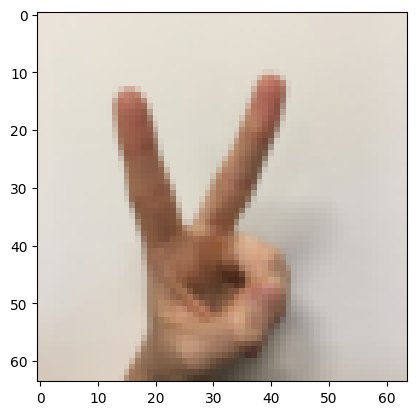

1/1 [==============================] - 0s 25ms/step - loss: 2.0198 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 0. 1. 0. 0. 0.]


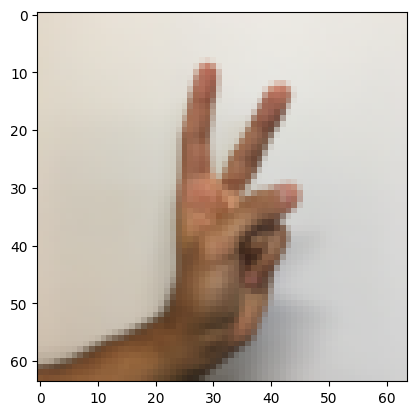

1/1 [==============================] - 0s 25ms/step - loss: 1.5105 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [0. 1. 0. 0. 0. 0.]


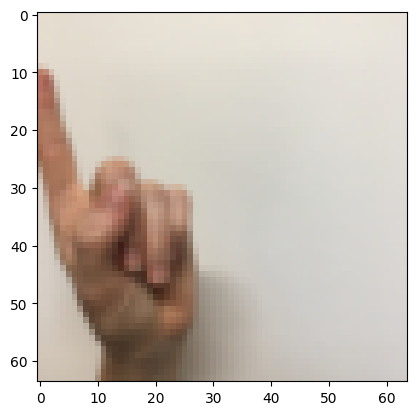

1/1 [==============================] - 0s 25ms/step - loss: 0.7331 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 2
GT Label is: y = [1. 0. 0. 0. 0. 0.]


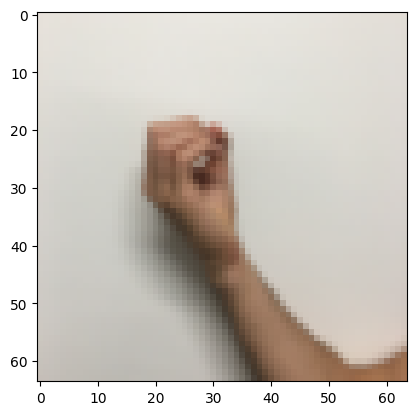

1/1 [==============================] - 0s 27ms/step - loss: 0.9748 - categorical_accuracy: 0.0000e+00
Your algorithm predicts: y = 4
GT Label is: y = [1. 0. 0. 0. 0. 0.]


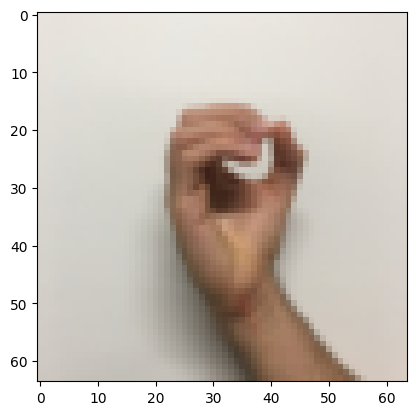

1/1 [==============================] - 0s 31ms/step - loss: 0.0075 - categorical_accuracy: 1.0000


In [ ]:
import skimage
from skimage import io
import numpy as np
ACCURACY = 1
# TODO : send all element to the model to predict


for element in train_dataset_oh.as_numpy_iterator():
  for image in range(element[0].shape[0]):
    img_array = tf.keras.utils.img_to_array(element[0][image])
    img_array.resize((64, 64,3))
    img_array = tf.expand_dims(img_array, 0)
    my_image_prediction = model(img_array)

    label = tf.expand_dims(element[1][image], 0)
    eval = model.evaluate(img_array, label)

    # TODO : print and plot the Non Good predictions
    if eval[ACCURACY] < 0.5 :
      print("Your algorithm predicts: y = " + str(np.argmax(np.squeeze(my_image_prediction))))
      print("GT Label is: y = " + str(element[1][image]))
      plt.imshow(np.squeeze(img_array))
      plt.show()




Oh it works ! Well ? As you can see, the model still makes some mistakes and it is totally normal. Nothing can be perfect. We want to minimize these mistakes as much as possible. This is were creating specific models is useful.

<img src="https://static.toiimg.com/thumb/msid-62318428,width-400,resizemode-4/62318428.jpg">



# X - To go further (Optional)

Let's try it on images taken from the internet.

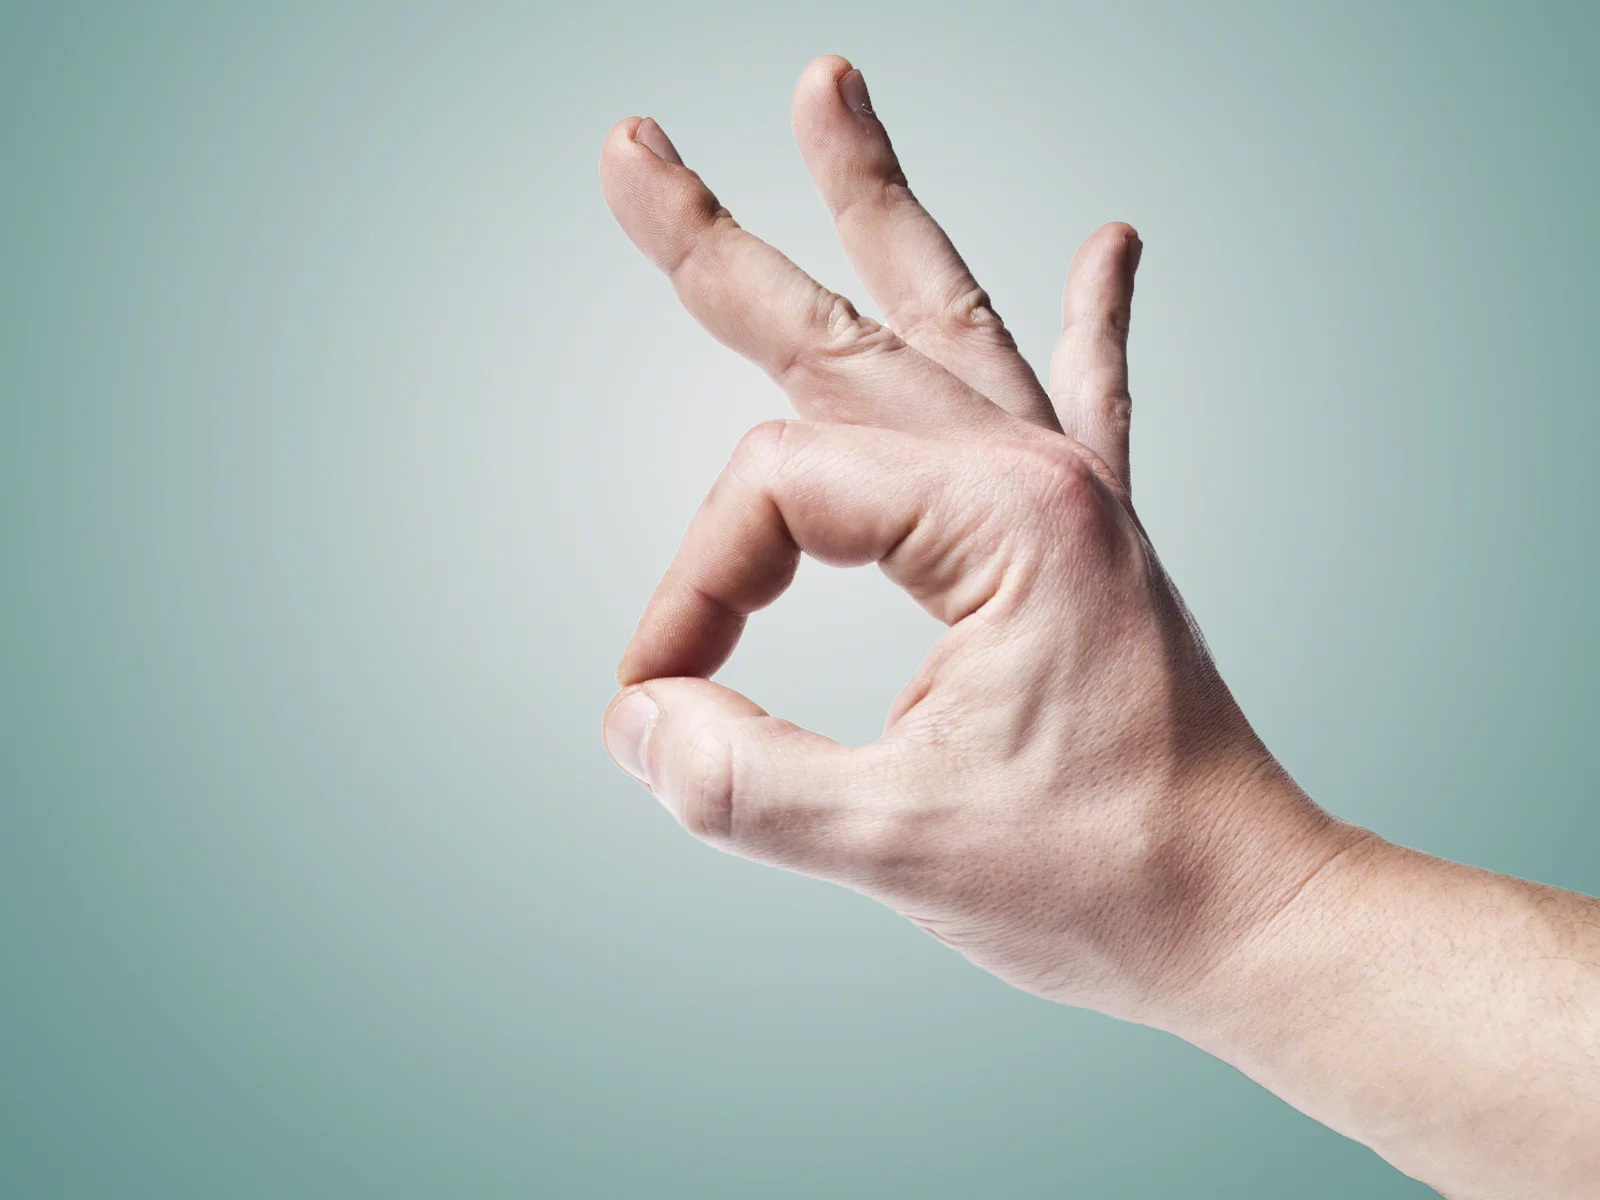

Your algorithm predicts: y = 2


In [ ]:
import skimage
from skimage import io
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

image_filename = r"https://media.npr.org/assets/img/2019/09/26/gettyimages-542502429-27867461d697a947417e7f8760b72b1c96880582-s1600-c85.webp" #URL of image
image_numpy = cv2.cvtColor(skimage.io.imread( image_filename ),cv2.COLOR_BGR2RGB)
cv2_imshow(image_numpy)

img_array = tf.keras.utils.img_to_array(image_numpy/255)
img_array.resize((64, 64,3))
img_array = tf.expand_dims(img_array, 0)
my_image_prediction = model(img_array)

print("Your algorithm predicts: y = " + str(np.argmax(np.squeeze(my_image_prediction))))